<a href="https://colab.research.google.com/github/Ms-Ainebyona/Computer-Vision-exam/blob/main/Cassava_Banana_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import glob
import os

In [ ]:
# Geting images from directory
cass_dir = "/content/drive/MyDrive/cassava cropped images/*.jpg"
ban_dir = "/content/drive/MyDrive/banana cropped images/*.jpg"
cassava_images = glob.glob(cass_dir)
banana_images = glob.glob(ban_dir)
print(f'Cassava: {len(cassava_images)} images')
print(f'Banana: {len(banana_images)} images')

Cassava: 765 images
Banana: 444 images


In [ ]:
# Load image def
def load_img(img_path):
  return cv2.imread(img_path)

In [ ]:
# Function to plot the images
def plot_figures(num_figures, fig_titles, img_list, size_of_fig=(10,8), num_cols=2, num_rows=2):
    plt.figure(figsize=size_of_fig)
    for i in range(num_figures):
        plt.subplot(num_rows,num_cols,i+1),plt.imshow(img_list[i])
        plt.title(fig_titles[i])
    plt.show()

In [ ]:
# Converting images from BGR to RGB
def ct_cr(bgr_img):
    return cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)

In [ ]:
# Converting images to gray_scale
def to_gray(img_arr):
  return cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)

### Exploration

In [ ]:
# Loading images into array
cass_imgs = [load_img(c) for c in cassava_images]
ban_imgs = [load_img(c) for c in banana_images]

In [ ]:
# Reshape definition
def reshape_image(img_arr, dim=(500,500)):
  return cv2.resize(img_arr, dim, interpolation = cv2.INTER_AREA)

In [ ]:
# Resizing images
cass_imgs_resized = [reshape_image(i) for i in cass_imgs]
ban_imgs_resized = [reshape_image(i) for i in ban_imgs]

In [ ]:
# type(cass_imgs_resized[5])

In [ ]:
# Hisogram plotting definition
def plot_hist(img_arr):
  color = ('b','g','r')
  for i,col in enumerate(color):
      histr = cv2.calcHist([img_arr],[i],None,[256],[0,256])
      plt.plot(histr,color = col)
      plt.xlim([0,256])
  plt.show()

In [ ]:
# Create feature detection objects
sift = cv2.xfeatures2d.SIFT_create(nfeatures=300)
# surf = cv2.xfeatures2d.SURF_create() 
orb = cv2.ORB_create(nfeatures=300) # ORB object

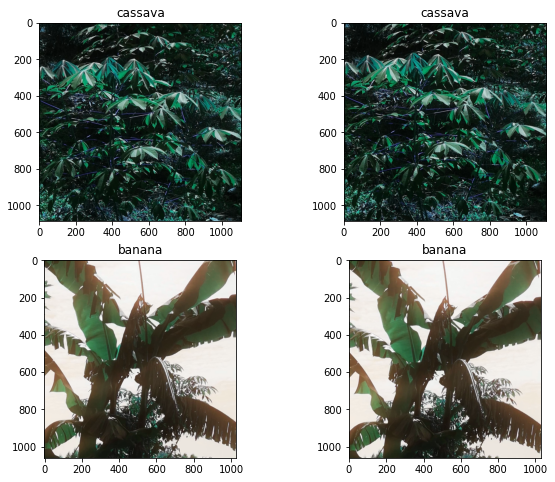

In [ ]:
plot_figures(4, ["cassava", "cassava", "banana", "banana"],
            cass_imgs[:2]+ban_imgs[:2]
            )

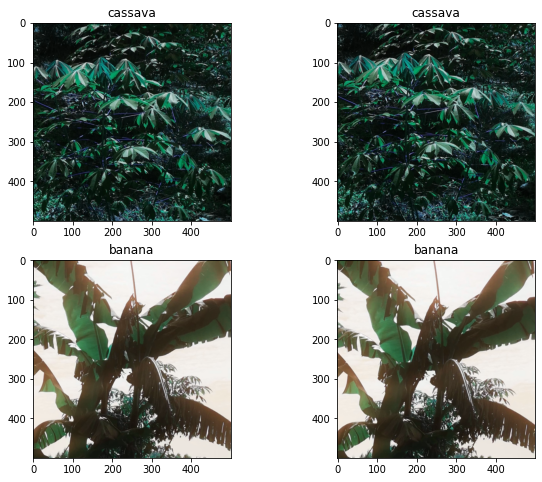

In [ ]:
plot_figures(4, ["cassava", "cassava", "banana", "banana"],
            cass_imgs_resized[:2]+ban_imgs_resized[:2]
            )

In [ ]:
import random

(1036, 1169, 3)


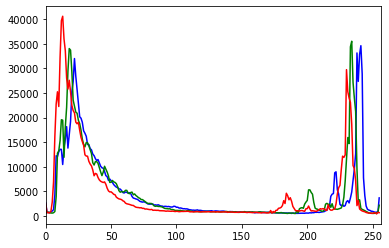

In [ ]:
# Plot histogram for a banana sample
sample = random.sample(ban_imgs, k = 1)[0]
# sample = ban_imgs[34]
print(sample.shape)
plot_hist(sample)

In [ ]:
# np.mean(np.mean(ban_imgs_resized[34], axis=0), axis=0)

In [ ]:
# detecting orb features
def get_orb_features(img_arr):
  kps_orb, des_orb = orb.detectAndCompute(img_arr, None)
  return kps_orb, des_orb

In [ ]:
# detecting sift features
def get_sift_features(img_arr):
  kps_sift, des_sift = sift .detectAndCompute(img_arr, None)
  return kps_sift, des_sift

In [ ]:
# Drawing keypoints
def draw_keypoints(img_arr, kps):
  return cv2.drawKeypoints(img_arr, kps, outImage=None, 
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#### Detect and draw Kepoints

In [ ]:
sample_kps, sample_des = get_orb_features(ban_imgs_resized[13])
sample_kps_cas, sample_des_cas = get_orb_features(cass_imgs_resized[2])

In [ ]:
sample_des.shape

(300, 32)

In [ ]:
sample_des_cas.shape

(300, 32)

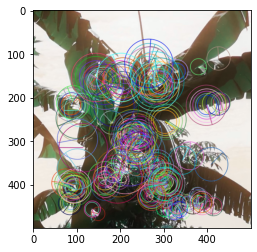

In [ ]:
plt.imshow(draw_keypoints(ban_imgs_resized[2].copy(), sample_kps))

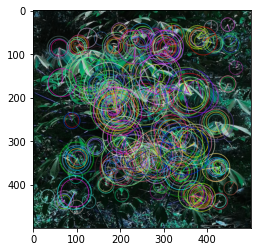

In [ ]:
plt.imshow(draw_keypoints(cass_imgs_resized[2].copy(), sample_kps_cas))

In [ ]:
# Detect features for test images
sample_kps1, sample_des1 = get_orb_features(ban_imgs_resized[4])
sample_kps_cas1, sample_des_cas1 = get_orb_features(cass_imgs_resized[4])

In [ ]:
sample_des1.shape

(300, 32)

In [ ]:
sample_des_cas1.shape

(300, 32)

In [ ]:
# create BFMatcher object for comparing descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
# Compare descriptors for both cassava and banana
matches_ban = bf.match(sample_des ,sample_des1)
matches_cass = bf.match(sample_des ,sample_des_cas1)

In [ ]:
# Sorting the matches
matches_ban = sorted(matches_ban, key = lambda x:x.distance)
matches_cass = sorted(matches_cass, key = lambda x:x.distance)

In [ ]:
# Compare decriptors for KNN
# matches_ban_knn = bf.knnMatch(sample_des ,sample_des1, k=10)
# matches_cass_knn = bf.knnMatch(sample_des ,sample_des_cas1, k=10)

In [ ]:
len(matches_ban)

186

In [ ]:
len(matches_cass)

89

In [ ]:
# matches_ban[0].distance
# matches_cass[0].distance

In [ ]:
matches_ban_dist = [m.distance for m in matches_ban]
matches_cass_dist = [m.distance for m in matches_cass]
print(sum(matches_ban_dist))
print(sum(matches_cass_dist))

4529.0
5575.0


In [ ]:
# matches_cass[0].distance

#### Extract features

In [ ]:
# Converting images to gray scale
cass_images_gray = [to_gray(c) for c in cass_imgs_resized]
ban_images_gray = [to_gray(c) for c in ban_imgs_resized]

In [ ]:
# Extracting ORB and SIFT features
cass_images_orb = [get_orb_features(i)[1].flatten() for i in cass_images_gray]
cass_images_sift = [get_sift_features(i)[1].flatten() for i in cass_images_gray]

ban_images_orb = [get_orb_features(i)[1].flatten() for i in ban_images_gray]
ban_images_sift = [get_sift_features(i)[1].flatten() for i in ban_images_gray]

In [ ]:
ban_images_orb

In [ ]:
cass_images_sift

In [ ]:
ban_images_sift

In [ ]:
# len(ban_images_orb)
# type(ban_images_orb[0])
# type(ban_images_gray[0])
# get_orb_features(ban_images_gray[0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating X features and y target
ban_images_orb = [b for b in ban_images_orb if b.shape == (9600,)]

X_orb = cass_images_orb+ban_images_orb
X_orb = np.asarray(X_orb)
y_orb = np.array([0]*len(cass_images_orb)+[1]*len(ban_images_orb))

X_sift = np.asarray(cass_images_sift+ban_images_sift)
y_sift = np.array([0]*len(cass_images_sift)+[1]*len(ban_images_sift))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
X_orb.shape
# cass_images_orb[0].flatten().shape
# ban_images_orb[443].shape
# for i,v in enumerate(ban_images_orb):
#   if v.shape[0] != 9600:
#     print(i)
# p = [i for i,v in enumerate(X_orb) if v.shape!=(9600,)]
# p
# ban_images_orb[0].shape

(1201, 9600)

In [ ]:
X_sift.shape

In [ ]:
# np.asarray([0]*len(cass_images_orb)).shape
# X_orb.shape
# np.asarray(cass_images_orb).shape
# np.asarray(ban_images_orb[0]).shape
# t = cass_images_orb+ban_images_orb
# len(t)
# t[0].shape
# t[1000].shape
# for i, v in enumerate(cass_images_orb):
#   # print(v)
#   if v.shape !=(500, 32):
#     print(i)

In [ ]:
# Creating the test and train sets
X_orb_train, X_orb_test, y_orb_train, y_orb_test = train_test_split(X_orb,
                                                                    y_orb,
                                                                    random_state=4647)

X_sift_train, X_sift_test, y_sift_train, y_sift_test = train_test_split(X_sift,
                                                                    y_sift,
                                                                    random_state=4647)

In [ ]:
# np.mean(X_orb_train[4])

In [ ]:
# Initializing the KNN object
neigh = KNeighborsClassifier()

In [ ]:
# Fit on train data
neigh.fit(X_orb_train, y_orb_train)

KNeighborsClassifier()

**Predictions**

In [ ]:
# Predictions
preds = neigh.predict(X_orb_test)

**Getting scores on train and test sets**



In [ ]:
# Getting scores on train and test sets
print(neigh.score(X_orb_train, y_orb_train))
print(neigh.score(X_orb_test, y_orb_test))

0.94
0.9302325581395349


**Note: 0 denotes for Cassava and 1 denotes for Banana in the Classification report.**

In [ ]:
from sklearn.metrics import classification_report

**Classification report**

In [ ]:
print(classification_report(y_orb_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       199
           1       0.83      1.00      0.91       102

    accuracy                           0.93       301
   macro avg       0.91      0.95      0.93       301
weighted avg       0.94      0.93      0.93       301

